<a href="https://colab.research.google.com/github/gabsouza1/travalhopy/blob/main/Aula05_OCR_Processamento_de_imagens_com_OpenCV_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hoje vamos começar a utilizar um OCR de imagem usando PyTesseract em Python no Colab. 

O reconhecimento óptico de caracteres (OCR - Optical Character Recognition) é uma tarefa popular em visão computacional. A popularidade se deve à sua ampla gama de aplicações, como  entrada de dados para negócios, reconhecimento de placas de veículos, verificação rápida de documentos, automação de tarefas e muitos mais. Basicamente, os OCRs são utilizados qualquer aplicativo que precise extrair texto de uma imagem.



In [47]:
# Passo 1: Instalar o Pytesseract e o tesseract-OCR no Colab:
! sudo apt install tesseract-ocr 
! pip install pytesseract

# Importar bibliotecas:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import scipy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Carregar imagem para o Colab. Podemos fazer o upload da imagem manualmente clicando em upload de arquivo, mas também podemos usar o seguinte código para fazer o upload da imagem para o Colab:


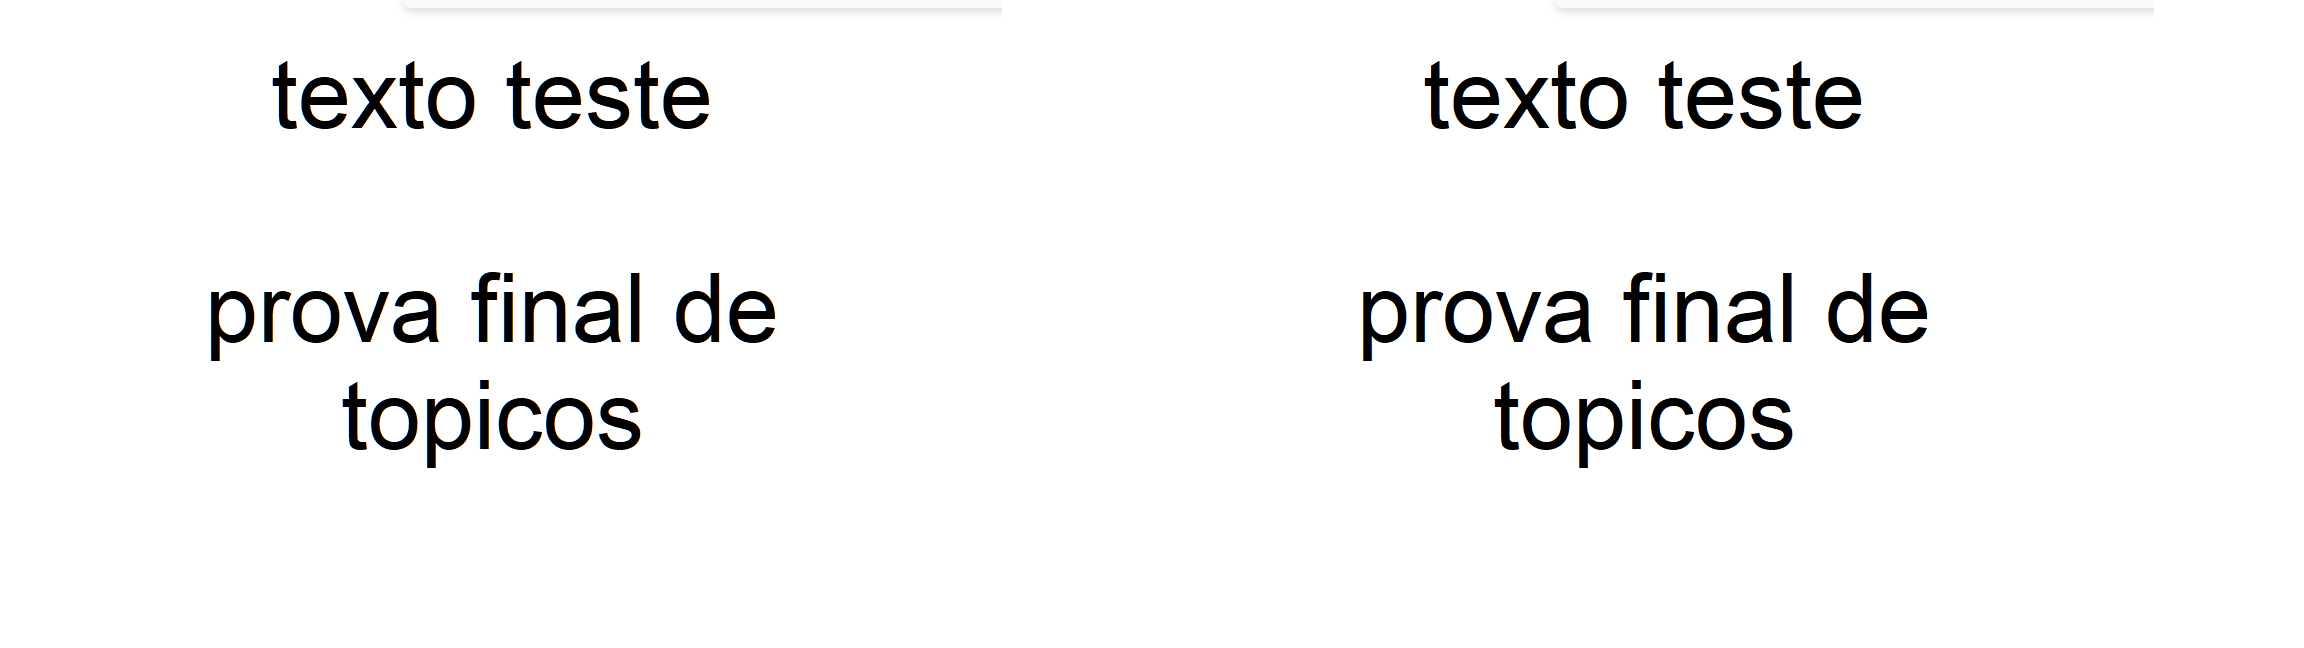

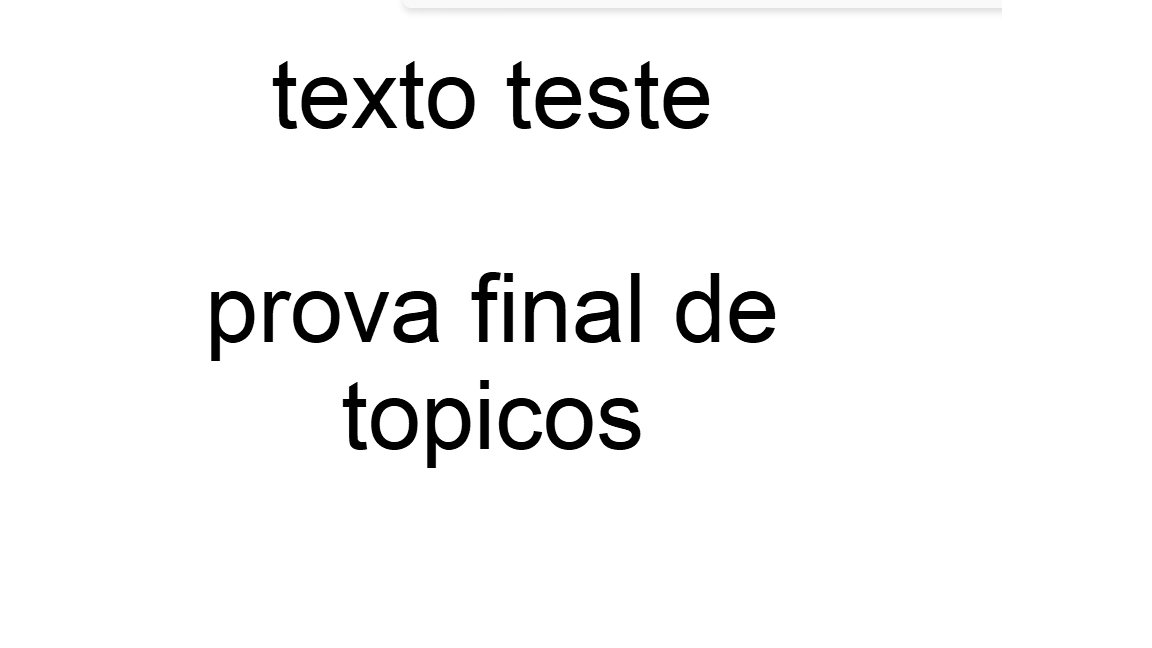

In [48]:
# Criando uma lista de 3 urls de imagem que vamos ler posteriormente:
urls = ["/prova.png"]

# Lendo e mostrando cada imagem da lista em BGR e RGB:
for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  
  final_frame = cv.hconcat((image, image_2)) 
  cv2_imshow(final_frame)

  print('\n')

  image_2_PB = cv.cvtColor( image_2, cv.COLOR_BGR2GRAY)
  cv2_imshow(image_2_PB)

In [49]:
# Alternativamente podemos fazer:
image2= "/prova.png"

# Chamamos a função que recebe uma imagem de entrada e extrai o seu texto:
extractedInformation = pytesseract.image_to_string(Image.open(image2))
print(extractedInformation)

texto teste

prova final de
topicos



Devemos agora obter as caixas delimitadoras (bounding boxes) para cada região onde exista texto. Para obter as coordenadas da caixa delimitadora para o texto, vamos utilizar a função "image_to_boxes" com o mesmo argumento do caminho da imagem da função anterior.

In [65]:
# Traz as coordenadas, fator de confiança, linha e caixa das palavras
print(pytesseract.image_to_data(image2))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1152	648	-1	
2	1	1	0	0	0	273	61	436	68	-1	
3	1	1	1	0	0	273	61	436	68	-1	
4	1	1	1	1	0	273	61	436	68	-1	
5	1	1	1	1	1	273	61	202	68	95	texto
5	1	1	1	1	2	507	61	202	68	95	teste
2	1	2	0	0	0	211	272	564	196	-1	
3	1	2	1	0	0	211	272	564	196	-1	
4	1	2	1	1	0	211	272	564	89	-1	
5	1	2	1	1	1	211	291	228	70	92	prova
5	1	2	1	1	2	471	272	169	71	96	final
5	1	2	1	1	3	676	273	99	70	96	de
4	1	2	1	2	0	343	380	298	88	-1	
5	1	2	1	2	1	343	380	298	88	93	topicos



In [80]:
import cv2
#imprimindo as caixas em volta das palavras
result = cv2.rectangle(image2, pt1=(273,61), pt2=((273+202), (61+68)), color=(0,87,0), thickness=3)
cv2_imshow(result)

TypeError: ignored